# SALES PREDICTION USING PYTHON

1. Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
2. In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading and reading 10 rows of data
dt = pd.read_csv('C:/Studies/Codsoft/Task4-Sales_Prediction/advertising.csv')
dt.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
# looking into data information
dt.info()
# no NAN values can be seen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
# looking into statistical information of data
dt.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot: xlabel='Sales', ylabel='Count'>

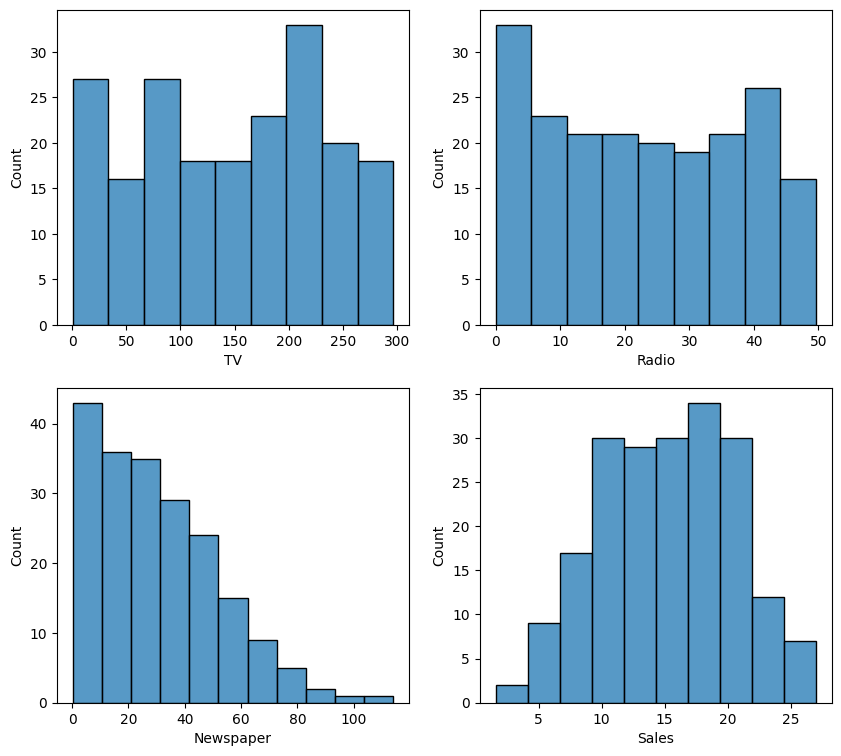

In [29]:
# checking distribution of datas
fig, axes = plt.subplots(2,2, figsize = (10,9))
sns.histplot(dt, x = 'TV' , ax = axes[0,0])
sns.histplot(dt, x = 'Radio' , ax = axes[0,1])
sns.histplot(dt, x = 'Newspaper' , ax = axes[1,0])
sns.histplot(dt, x = 'Sales' , ax = axes[1,1])
# conclusion - TV, Radio is somewhat constantly distributed while Newspaper is right skewed and Sales is normally distributed if we talk superficially

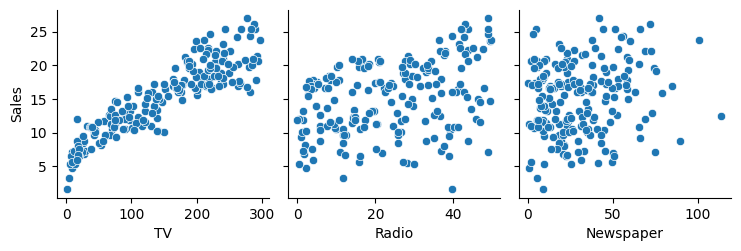

In [40]:
sns.pairplot(data=dt, x_vars=['TV','Radio','Newspaper'], y_vars= 'Sales', kind= 'scatter')
# conclusion - 
# 1. with increase in money investment done in TV the Sales also increases, high correlation noticed
# 2. while radio is unpredictable but has little direct proportionality (correlation) with increaing nature,
# 3. Newspaper shows no correlation thus unpredictable

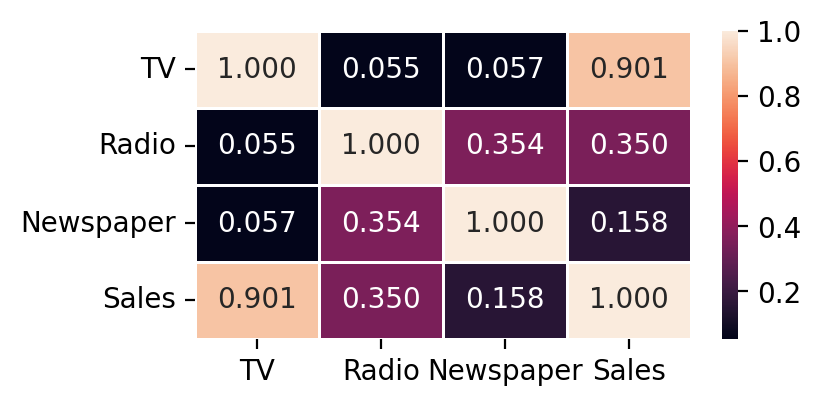

In [38]:
# to plot a heatmap from seaborn to show correlation of columns with each other.
corr = dt.corr(method = 'pearson')
plt.figure(figsize=(4,2), dpi = 200)
sns.heatmap(corr, annot=True, fmt=".3f", linewidth=.5)
plt.show()

In [41]:
# copying data such that original is not affected
data = dt.copy(deep= True)

In [42]:
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [43]:
# importing train test model and loading independent variables to x and dependent variables to y
from sklearn.model_selection import train_test_split
x = data[['TV','Radio','Newspaper']]
y = data['Sales']

In [44]:
# assigning variables in train test split where test size is 30%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [45]:
# importing Regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
# we won't use Ridge regression as there is no high correlation between independent variabales,

In [46]:
# importing metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
# Linear Regression algorithm
lr = LinearRegression()
lr.fit(x_train,y_train)
lpred = lr.predict(x_test)
lmae = mean_absolute_error(y_test,lpred)
lmse = mean_squared_error(y_test,lpred)
lr2 = r2_score(y_test,lpred)
print(f'The mean absolute score is: {lmae}\nThe mean squared error is: {lmse}\nThe root mean squared error is: {np.sqrt(lmse)}\nR2 score is: {lr2}')

The mean absolute score is: 1.194741713405674
The mean squared error is: 2.370659971225658
The root mean squared error is: 1.5396947656031237
R2 score is: 0.9071151423684273


In [55]:
# Decision Tree algorithm
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dpred = dtr.predict(x_test)
dmae = mean_absolute_error(y_test,dpred)
dmse = mean_squared_error(y_test,dpred)
dr2 = r2_score(y_test,dpred)
print(f'The mean absolute score is: {dmae}\nThe mean squared error is: {dmse}\nThe root mean squared error is: {np.sqrt(dmse)}\nR2 score is: {dr2}')

The mean absolute score is: 0.9499999999999997
The mean squared error is: 1.8246666666666664
The root mean squared error is: 1.3508022307749816
R2 score is: 0.9285077127822828


In [58]:
# Random Forest algorithm
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rpred = rfr.predict(x_test)
rmae = mean_absolute_error(y_test,rpred)
rmse = mean_squared_error(y_test,rpred)
rr2 = r2_score(y_test,rpred)
print(f'The mean absolute score is: {rmae}\nThe mean squared error is: {rmse}\nThe root mean squared error is: {np.sqrt(rmse)}\nR2 score is: {rr2}')

The mean absolute score is: 0.7294666666666654
The mean squared error is: 0.9049584000000015
The root mean squared error is: 0.9512930147961781
R2 score is: 0.9645428137452214


In [60]:
# Scalar Vector Machine algorithm
svm = SVR()
svm.fit(x_train,y_train)
spred = svm.predict(x_test)
smae = mean_absolute_error(y_test,spred)
smse = mean_squared_error(y_test,spred)
sr2 = r2_score(y_test,spred)
print(f'The mean absolute score is: {smae}\nThe mean squared error is: {smse}\nThe root mean squared error is: {np.sqrt(smse)}\nR2 score is: {sr2}')

The mean absolute score is: 1.3966918034796305
The mean squared error is: 3.10100153708118
The root mean squared error is: 1.7609660806163132
R2 score is: 0.8784996204503526


In [61]:
# Lasso Algorithm
las = Lasso()
las.fit(x_train,y_train)
lapred = las.predict(x_test)
lamae = mean_absolute_error(y_test,lapred)
lamse = mean_squared_error(y_test,lapred)
lar2 = r2_score(y_test,lapred)
print(f'The mean absolute score is: {lamae}\nThe mean squared error is: {lamse}\nThe root mean squared error is: {np.sqrt(lamse)}\nR2 score is: {lar2}')

The mean absolute score is: 1.2115022009053553
The mean squared error is: 2.399512545671173
The root mean squared error is: 1.5490360052856011
R2 score is: 0.9059846692924887


Note:
Except Random Forest Regressor which gave r2 score of 0.96 all the algorithms gave same r2 score of around 0.90.
The purpose to show these many algorithms and metrics is for reference and knowledge of which works better, or else i could create a simple def where it 
accepts models and data and then make a for loop to input all models rather than this tedious work. It requires just one cell.